# Day 9: Space

In [159]:
%matplotlib inline

import pandas as pd
from geopy.geocoders import Nominatim

import contextily as cx
import geopandas as gpd
import rasterio
from shapely.geometry import Point, Polygon
from rasterio.plot import show as rioshow

#plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [293]:
from matplotlib import font_manager
#set fonts
label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\A-Space Bold Demo.otf')
footer_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\A-Space Regular Demo.otf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\NASAL.ttf')

# Europe at nightm

In [69]:
#get nightlights satellite data for europe
nightlights = cx.providers.NASAGIBS.ViirsEarthAtNight2012
europe =  cx.Place("europe",  source=nightlights)

In [258]:
# get cities
cities = pd.read_csv("european_cities.csv")

In [259]:
# get coordinates for cities using Nominatim API
app = Nominatim(user_agent="mapping_projects")

geodata = {"lat": [], "lon": []}
for location in cities["City"]:
    loc_data = app.geocode(location).raw
    geodata["lat"].append(loc_data["lat"])
    geodata["lon"].append(loc_data["lon"])

cities["lat"] = geodata["lat"]
cities["lon"] = geodata["lon"]

#override data for Saint Petersburg
loc_data = app.geocode("Saint Petersburg, Russia").raw
cities.loc[cities["City"]== "Saint Petersburg", "lat"] = loc_data["lat"]
cities.loc[cities["City"]== "Saint Petersburg", "lon"] = loc_data["lon"]

In [260]:
#prepare cities dataset
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(cities['lon'].astype(float), cities['lat'].astype(float))]
cities = gpd.GeoDataFrame(cities, crs = crs, geometry = geometry)
cities = cities.to_crs(3857)
cities.head()

C:\Users\lisa.hornung\anaconda3\envs\py3_ox\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Country,City,lat,lon,geometry
0,Albania,Tirane,41.3305141,19.825562857582966,POINT (2206971.562 5061215.332)
1,Austria,Vienna,48.2083537,16.3725042,POINT (1822578.831 6141587.728)
2,Belarus,Minsk,53.9024716,27.5618225,POINT (3068168.046 7151707.177)
3,Belgium,Brussels,50.8465573,4.351697,POINT (484428.694 6594196.236)
4,Bosnia & Herzegovina,Sarajevo,43.8519774,18.3866868,POINT (2046796.612 5442563.847)


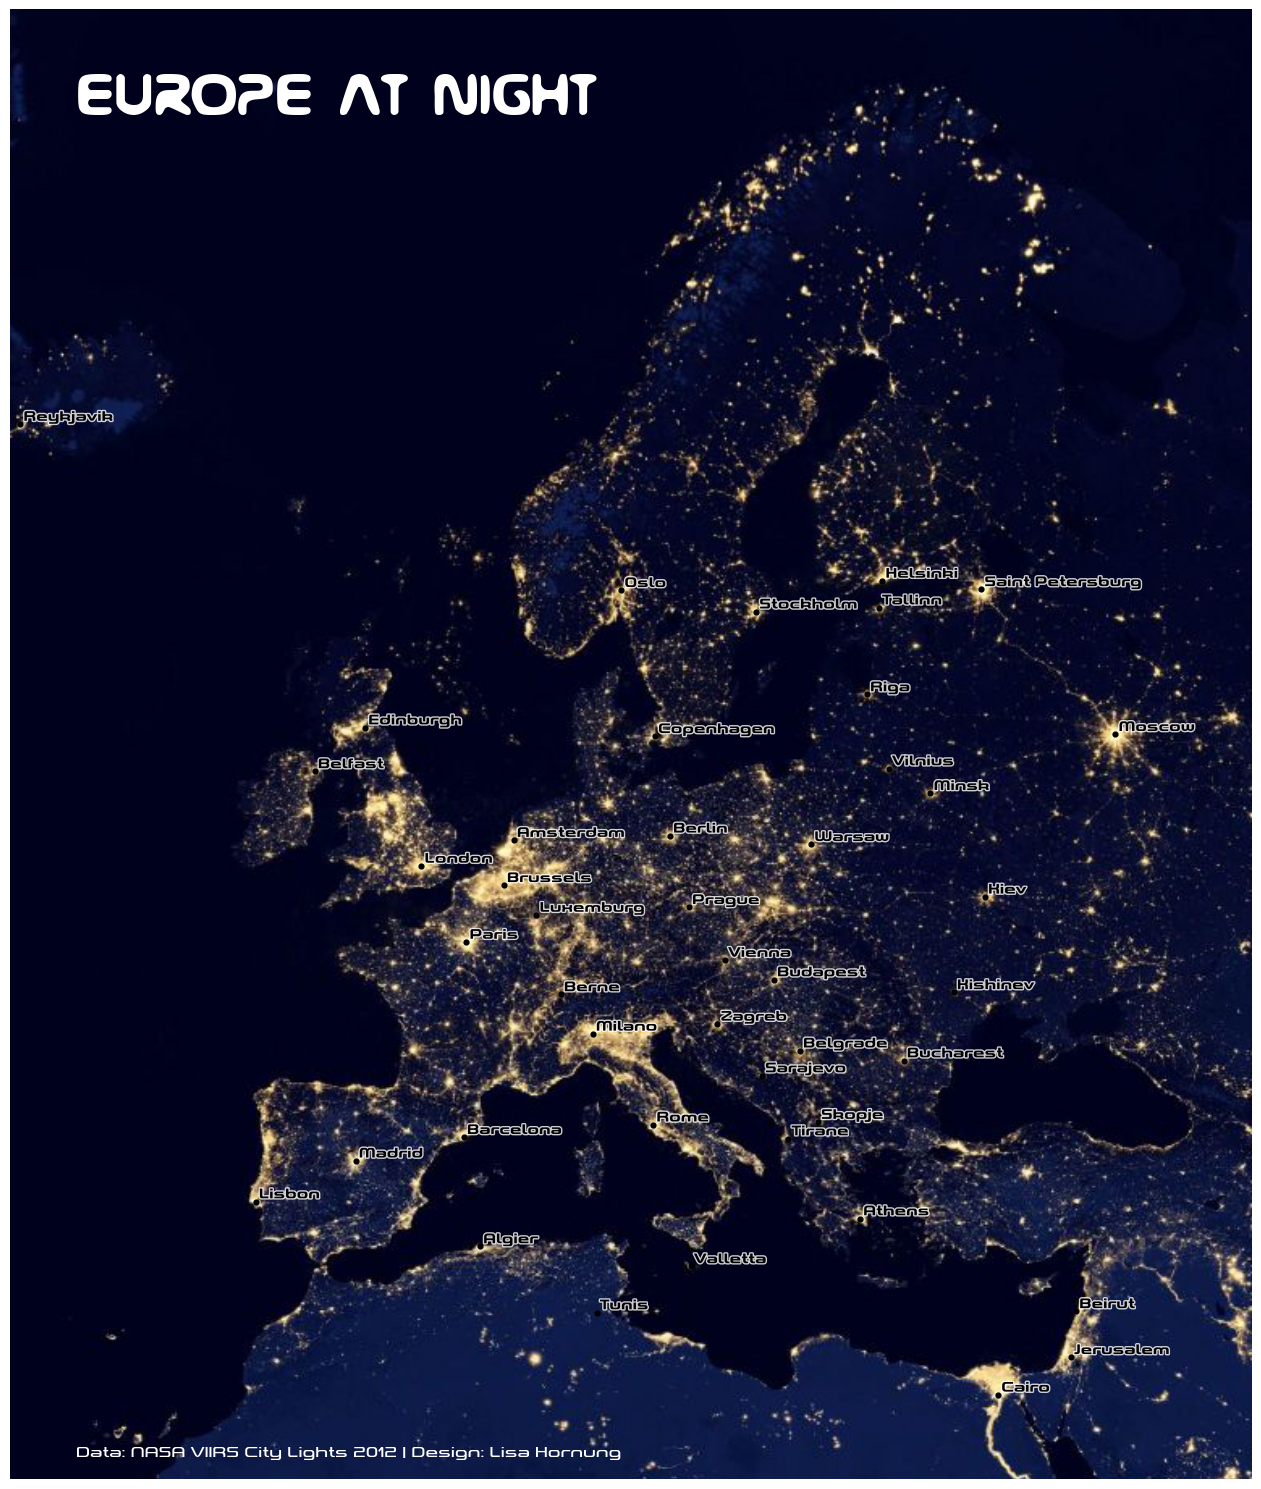

In [302]:
#plot
fig, ax = plt.subplots(figsize = (15,15), layout="tight")

#plot europe nightlights
europe.plot(ax, attribution="")
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

ax.set_ylim(3000000, 11900000)
ax.axis("off")

cities.plot(color="black", ax=ax, markersize=12, alpha=1)

for i in range(len(cities)):
    name = ax.text(cities["geometry"].x[i]+20000, cities["geometry"].y[i]+20000, cities["City"][i], color="black",
           fontsize=10, fontproperties=label_font)
    
    name.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white', alpha=0.8),path_effects.Normal()])

#Title and annotations
plt.figtext(0.13,0.92,'Europe at night', fontsize = 50,color='white', fontproperties=title_font)
plt.figtext(0.13,0.025,'Data: NASA VIIRS City Lights 2012 | Design: Lisa Hornung', fontsize = 11, 
            fontproperties=footer_font, color='white')

plt.savefig("europe-at-night.png", bbox_inches='tight',  transparent=False, pad_inches=0)

plt.show()

# Other explorations

<AxesSubplot:title={'center':'United Kingdom'}, xlabel='X', ylabel='Y'>

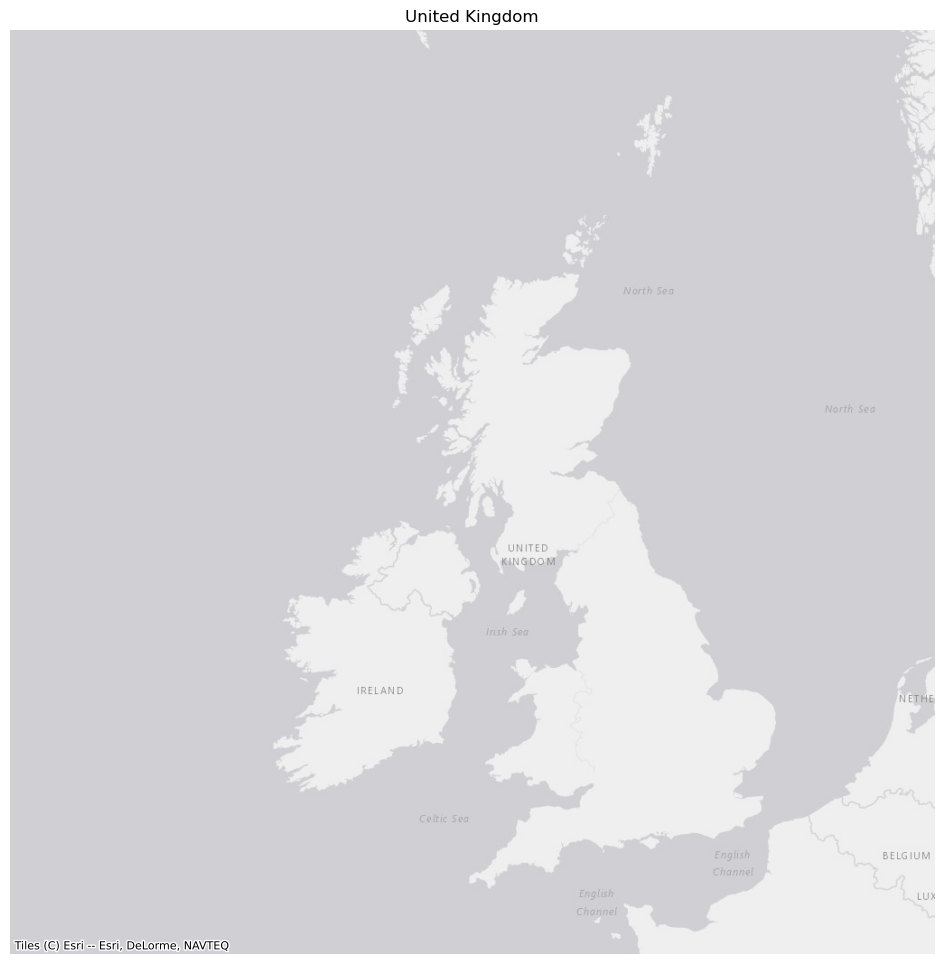

In [93]:
#data = cx.providers.HikeBike.HillShading
data = cx.providers.Esri.WorldGrayCanvas
uk =  cx.Place("United Kingdom",  source=data)
uk.plot()

In [97]:
#load world map
world_map = gpd.GeoDataFrame.from_file("world_countries.geojson")
uk_map = gpd.GeoDataFrame.from_file("uk_regions.geojson")
uk_outline = uk_map.boundary

In [50]:
#filter polygons by bounding box
xmin = -25.316629842358385
ymin = 30.005338465582778 
xmax = 45.21072133737791
ymax = 71.20137827924512 

europe = world_map.cx[xmin:xmax, ymin:ymax]

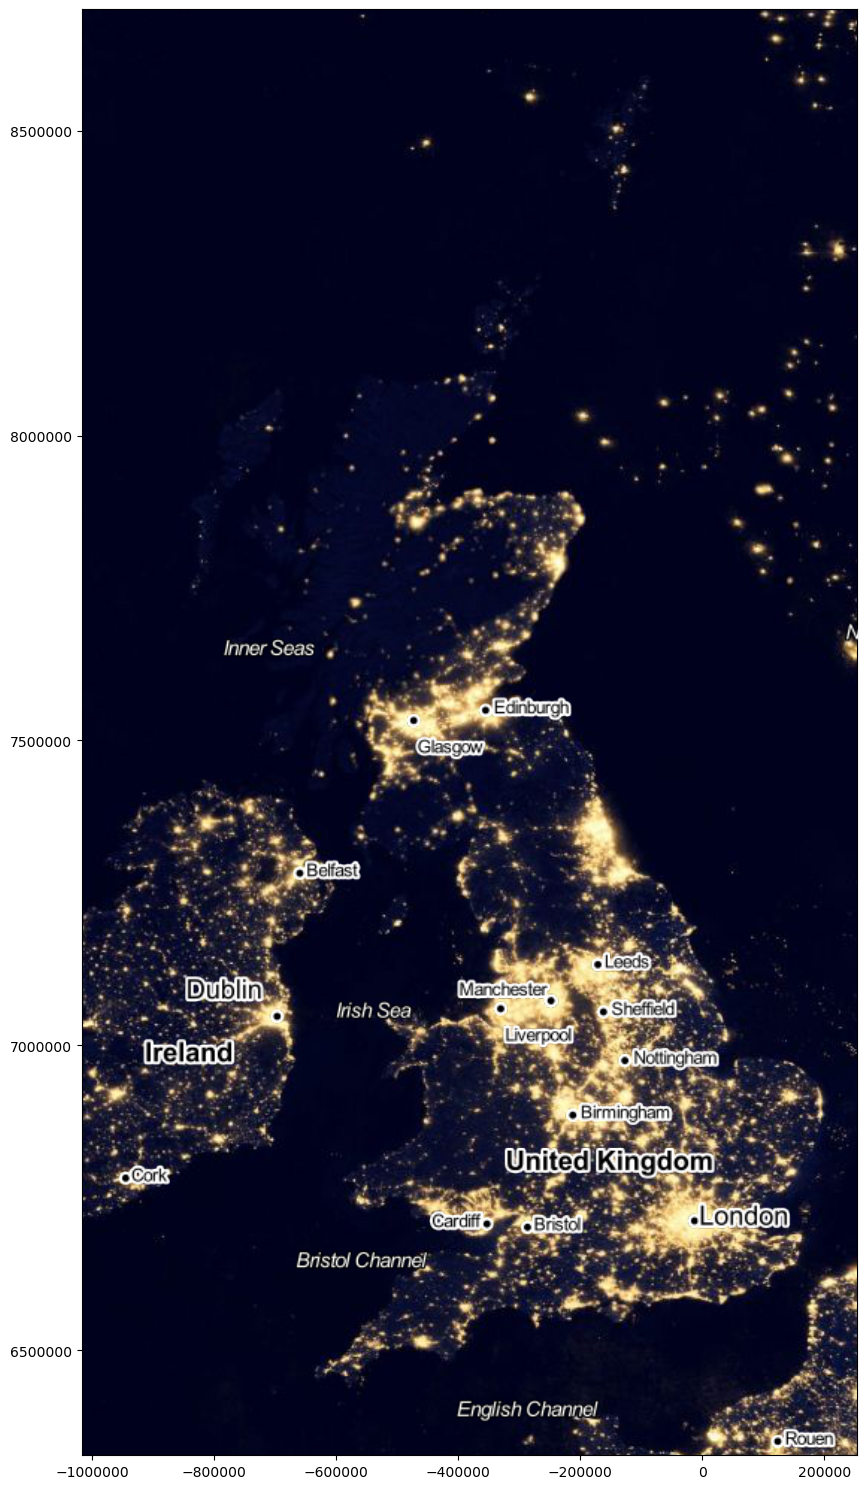

In [132]:
fig, ax = plt.subplots(figsize = (15,15), layout="tight")

#fig.set_facecolor("white")

### MAPS
#### UK
uk_outline.to_crs(epsg=3857).plot(ax=ax, facecolor=None, edgecolor='#A2AEBB', linewidth=0, alpha=1)
#ax.axis('off')
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
cx.add_basemap(ax, source=cx.providers.NASAGIBS.ViirsEarthAtNight2012, attribution="")
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, attribution="")